In [3]:
import os
import numpy as np
import imageio
import cv2
import pandas as pd
gif = imageio.mimread('1.gif')
image=np.array(gif).reshape(243,320)

In [4]:
import matplotlib.pyplot as plt

In [7]:
def show_image(image):
    plt.imshow(image,cmap=plt.cm.gray)
    plt.plot()

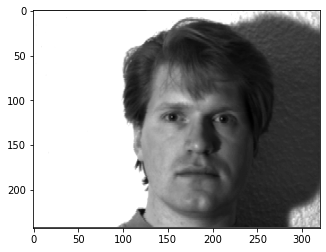

In [6]:
show_image(image)

In [5]:
noise_image=image.reshape(-1).copy()

In [6]:
for i in range(noise_image.shape[0]):
    judge=np.random.random()
    if judge<0.1:
        noise_image[i]=0
    if judge>0.9:
        noise_image[i]=255

In [7]:
noise_image=noise_image.reshape(243,-1)

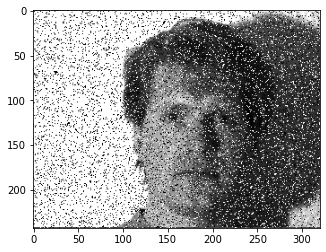

In [8]:
show_image(noise_image)

In [9]:
plt.imsave('noise_image.gif',noise_image,cmap=plt.cm.gray)

In [14]:
class Robust_PCA:
    def __init__(self,D):
        self.D=D.astype(np.double)
        self.Y=np.zeros_like(self.D)
        self.S=np.zeros_like(self.D)
        self.L=np.zeros_like(self.D)
        self.delta=np.linalg.norm(self.D,ord='fro')*1e-7
        self.miu=np.prod(D.shape)/(4*np.linalg.norm(self.D,ord=1))
        self.miu_inv=1/self.miu
        self.lmbda=1/np.sqrt(np.max(D.shape))

    def S_tou(self,M,tou):
        return np.sign(M)*np.maximum((np.abs(M)-tou),np.zeros_like(M))
    
    def D_tou(self,X,tou):
        U, Sigma, V = np.linalg.svd(X, full_matrices=False)
        return U@np.diag(self.S_tou(Sigma,tou))@V

    def fit(self,max_iter=2001,print_iter=100):
        for i in range(max_iter):
            self.L=self.D_tou(self.D-self.S+self.miu_inv*self.Y,self.miu_inv)
            self.S=self.S_tou(self.D-self.L+self.miu_inv*self.Y,self.miu_inv*self.lmbda)
            tmp=self.D-self.L-self.S
            self.Y+=self.miu*tmp
            judge=np.linalg.norm(tmp,ord='fro')
            if(i%print_iter==0):
                print(i,judge)
            if(judge<self.delta):
                print(i,judge)
                break
        return (self.L,self.S)

In [15]:
robust_pca=Robust_PCA(noise_image)

In [16]:
L,S=robust_pca.fit(max_iter=3000,print_iter=250)

0 29.887394014353614
250 0.05500097571171684
500 0.19907736924654568
750 0.23493214854224762
1000 0.19916361374975924
1250 0.2989565399280636
1500 0.05510535294519598
1750 0.015696939725898057
2000 0.005606144659125488
2044 0.004787560750458211


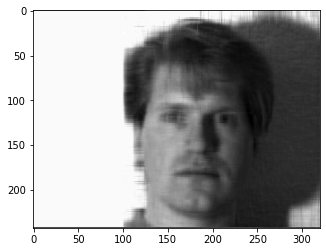

In [17]:
show_image(L)

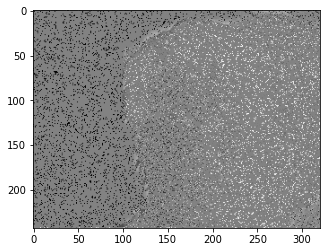

In [18]:
show_image(S)